## Final Project Submission

Please fill out:
* Student name: Mitchelle Aquinate Okubasu
* Student pace: part time
* Scheduled project review date/time: 26/03/2023 9:00pm
* Instructor name: Samwel Jane
* Blog post URL:


## Project Overview:

Using regression modeling to analyze house sales in a northwestern county.

Data Science process: **CRISP-DM**

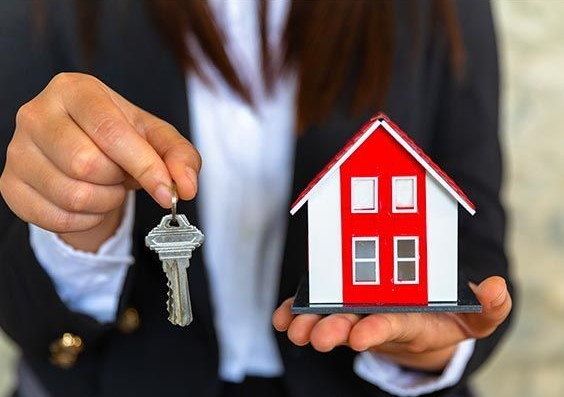

Data Science process: CRISP-DM

## Business Problem

Makao Ltd Company is interested in the need to provide advice to homeowners about how different home features might increase the estimated value of their homes, and by what amount.

## Business Understanding.

Makao ltd is a Real Estate Agency based in King County. Makao Ltd company was formed and registered in the year 2010 to help  home owners and residents of King County to buy, sell and rent their homes. The company has been doing well but not well enough in helping their customers buy and or sell their homes. They have received a number of negative feeedbacks and complains from customers they helped purchase homes. They also lost a number of customers and would like to do better in terms of serving their customers' and meeting their customers' needs. They would also like to regain the trust of the customers they lost and improve their services.
Makao ltd company's mission is **Dedicated in transforming lives, homes and in customer satisfaction.**
The company goals include;
 - Make clients life easier when it comes to buying and or selling their homes.
 - Deliver excellent services to clients by putting client's interest first.
 - Built trust relations with clients.
 - Building a reputation when it comes to buying and selling homes



## Objective

 - To find the relationship between home renovation and house pricing.
 - To determine the relationship between various house features and the house price.
 - To determine how the overall condition and grade can affect pricing.
 - To establish relationship between house condition, pricing and the year renovated.

**Analytical Questions**
1. Is there difference between the price of a renovated and an "unrenovated" house? If Yes, By how much?
2. What factors contribute to the house price? (is it the number of bedrooms, bathrooms, etc)
3. Does the overall condition and grade of the house determine the selling price?
4. Is here any relationship between house condition, pricing and year renovated

## Data Mining and Data Understanding.


In this project we use King County housing data obtained from Canvas. The data contains different columns describing various features of the data. The data will be useful in predicting the selling price of a house under different house features. 

In [1]:
# importing necessary libraries for data loading and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading the datasets
housing_df = pd.read_csv("data/kc_house_data.csv", index_col = "id")

In [3]:
housing_df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113


In [4]:
housing_df.shape

(21597, 20)

The data contains 21597 rows and 20 columns

In [5]:
#dropping columns
housing_df.drop(housing_df.iloc[:, 15:], inplace=True, axis=1)

In [6]:
housing_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
id,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0


In [7]:
#dropping also sqft_above and basement
housing_df.drop(['sqft_above','sqft_basement','bathrooms','floors'], axis=1, inplace =True)

In [8]:
#seperating date into month and year 
housing_df['date'] = pd.to_datetime(housing_df['date'])

# extracting month and year 
housing_df['month_sold'] = housing_df['date'].dt.month
housing_df['year_sold'] = housing_df['date'].dt.month

# dropping the date column
housing_df.drop('date', axis=1, inplace=True)



In [9]:
housing_df.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'month_sold',
       'year_sold'],
      dtype='object')

In [10]:
#checking and dropping duplicates
housing_df.duplicated().sum()


2

In [11]:
housing_df.drop_duplicates(keep = 'first')

,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built,yr_renovated,month_sold,year_sold
id,,,,,,,,,,,,
7129300520,221900.0,3,1180,5650,NaN,0.0,3,7,1955,0.0,10,10
6414100192,538000.0,3,2570,7242,0.0,0.0,3,7,1951,1991.0,12,12
5631500400,180000.0,2,770,10000,0.0,0.0,3,6,1933,NaN,2,2
2487200875,604000.0,4,1960,5000,0.0,0.0,5,7,1965,0.0,12,12
1954400510,510000.0,3,1680,8080,0.0,0.0,3,8,1987,0.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,1530,1131,0.0,0.0,3,8,2009,0.0,5,5
6600060120,400000.0,4,2310,5813,0.0,0.0,3,8,2014,0.0,2,2
1523300141,402101.0,2,1020,1350,0.0,0.0,3,7,2009,0.0,6,6


In [12]:
housing_df.dtypes

price           float64
bedrooms          int64
sqft_living       int64
sqft_lot          int64
waterfront      float64
view            float64
condition         int64
grade             int64
yr_built          int64
yr_renovated    float64
month_sold        int64
year_sold         int64
dtype: object

In [13]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21597 non-null  float64
 1   bedrooms      21597 non-null  int64  
 2   sqft_living   21597 non-null  int64  
 3   sqft_lot      21597 non-null  int64  
 4   waterfront    19221 non-null  float64
 5   view          21534 non-null  float64
 6   condition     21597 non-null  int64  
 7   grade         21597 non-null  int64  
 8   yr_built      21597 non-null  int64  
 9   yr_renovated  17755 non-null  float64
 10  month_sold    21597 non-null  int64  
 11  year_sold     21597 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 2.1 MB


The view, waterfront and yr_renovated columns have a number of missing values.

In [14]:
#investigating on null values
housing_df.isna().sum()

price              0
bedrooms           0
sqft_living        0
sqft_lot           0
waterfront      2376
view              63
condition          0
grade              0
yr_built           0
yr_renovated    3842
month_sold         0
year_sold          0
dtype: int64

yr_renovated has the most null values but it is required in the analysis to determine whether a renovated home costs more and whether we should renovated to increase home value.

In [15]:
housing_df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [16]:
mode_view = housing_df['view'].mode()
mode_view

0    0.0
Name: view, dtype: float64

In [17]:
#dealing with missing values
#dropping waterfront and filling null values in view with 0
housing_df['view'].fillna(mode_view)

id
7129300520    0.0
6414100192    0.0
5631500400    0.0
2487200875    0.0
1954400510    0.0
             ... 
263000018     0.0
6600060120    0.0
1523300141    0.0
291310100     0.0
1523300157    0.0
Name: view, Length: 21597, dtype: float64

In [18]:
#dropping waterfront column
housing_df.drop('waterfront', axis=1, inplace = True)


In [19]:
housing_df['yr_renovated'].value_counts().sort_values(ascending = False).head(20)

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
2000.0       29
2005.0       29
2004.0       22
1990.0       22
2009.0       21
2006.0       20
1989.0       20
2002.0       17
1984.0       16
1991.0       16
1998.0       16
2008.0       15
1999.0       15
1983.0       15
2001.0       15
Name: yr_renovated, dtype: int64

Only **744** houses have a record of when they were renovated. The other **17011** contain **0** and **3842** are null. Assuming  0 means not renovated, we will compare house prices of those not renovated against those that were renovated.

In [20]:
#Descriptive statistics of the whole dataset
housing_df.describe()

,price,bedrooms,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,month_sold,year_sold
count,2.159700e+04,21597.000000,21597.000000,2.159700e+04,21534.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2080.321850,1.509941e+04,0.233863,3.409825,7.657915,1970.999676,83.636778,6.573969,6.573969
std,3.673681e+05,0.926299,918.106125,4.141264e+04,0.765686,0.650546,1.173200,29.375234,399.946414,3.115061,3.115061
min,7.800000e+04,1.000000,370.000000,5.200000e+02,0.000000,1.000000,3.000000,1900.000000,0.000000,1.000000,1.000000
25%,3.220000e+05,3.000000,1430.000000,5.040000e+03,0.000000,3.000000,7.000000,1951.000000,0.000000,4.000000,4.000000
50%,4.500000e+05,3.000000,1910.000000,7.618000e+03,0.000000,3.000000,7.000000,1975.000000,0.000000,6.000000,6.000000
75%,6.450000e+05,4.000000,2550.000000,1.068500e+04,0.000000,4.000000,8.000000,1997.000000,0.000000,9.000000,9.000000
max,7.700000e+06,33.000000,13540.000000,1.651359e+06,4.000000,5.000000,13.000000,2015.000000,2015.000000,12.000000,12.000000


We can see that the min yr_built is 1900 which is a long time ago and the min yr_renovated is 0 which we assummed never renovated

In [21]:
#recent data
housing_df[housing_df['yr_built'] >= 1999].count()

price           5019
bedrooms        5019
sqft_living     5019
sqft_lot        5019
view            5006
condition       5019
grade           5019
yr_built        5019
yr_renovated    4136
month_sold      5019
year_sold       5019
dtype: int64

filtering the data to homes recently built leads to loss of data

In [22]:
#renaming Price to Selling Price
housing_df = housing_df.rename(columns={'price': 'Selling price'})

After dropping some columns during the data preparation process, we are left with a number that will be used in the analysis and modelling process.
The columns left will be helpful in understanding how different house features affect the selling price. And how altering them change the selling price.

The data has limited information on yr_renovated


### Data Exploration:

In [23]:
#creating a new column - age of the house- which will be given by the latest year minus year built
#latest year
X = housing_df['yr_built'].max()
print(X)
#age column 
housing_df['Age'] = X - housing_df['yr_built']
housing_df.columns

2015


Index(['Selling price', 'bedrooms', 'sqft_living', 'sqft_lot', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'month_sold',
       'year_sold', 'Age'],
      dtype='object')

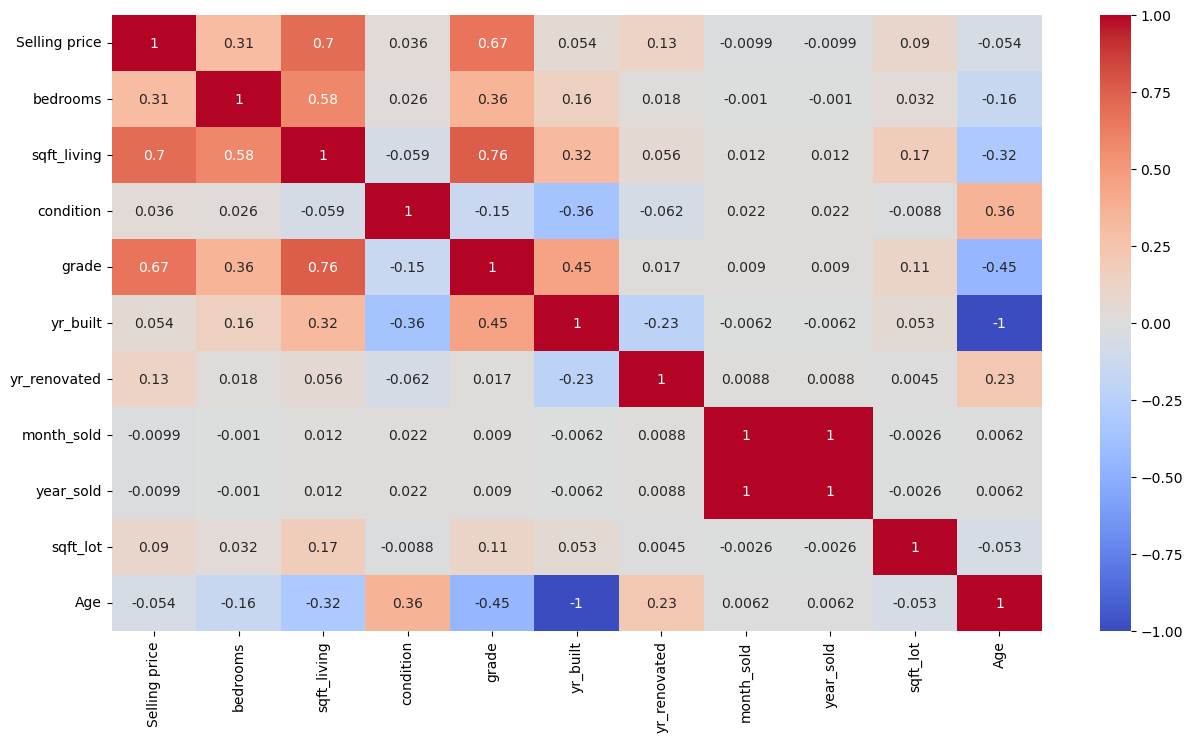

In [24]:
#looking at a correlation heatmap between different variables
plt.figure(figsize=(15, 8))
corr_matrix1 =housing_df[['Selling price','bedrooms','sqft_living','condition','grade', 'yr_built','yr_renovated','month_sold','year_sold', 'sqft_lot','Age']].corr()
sns.heatmap(corr_matrix1, cmap='coolwarm',annot=True)
plt.show()

We begin exploration by looking at how yr_built, yr_renovated and yr_sold affect the price of a house:

Grouping yr_renovated into 3 groups
 - renovated = housing_df["yr_renovated"] > 0
 - unrenovated = housing_df["yr_renovated"] == 0
 - null = housing_df["yr_renovated"].isna().sum()

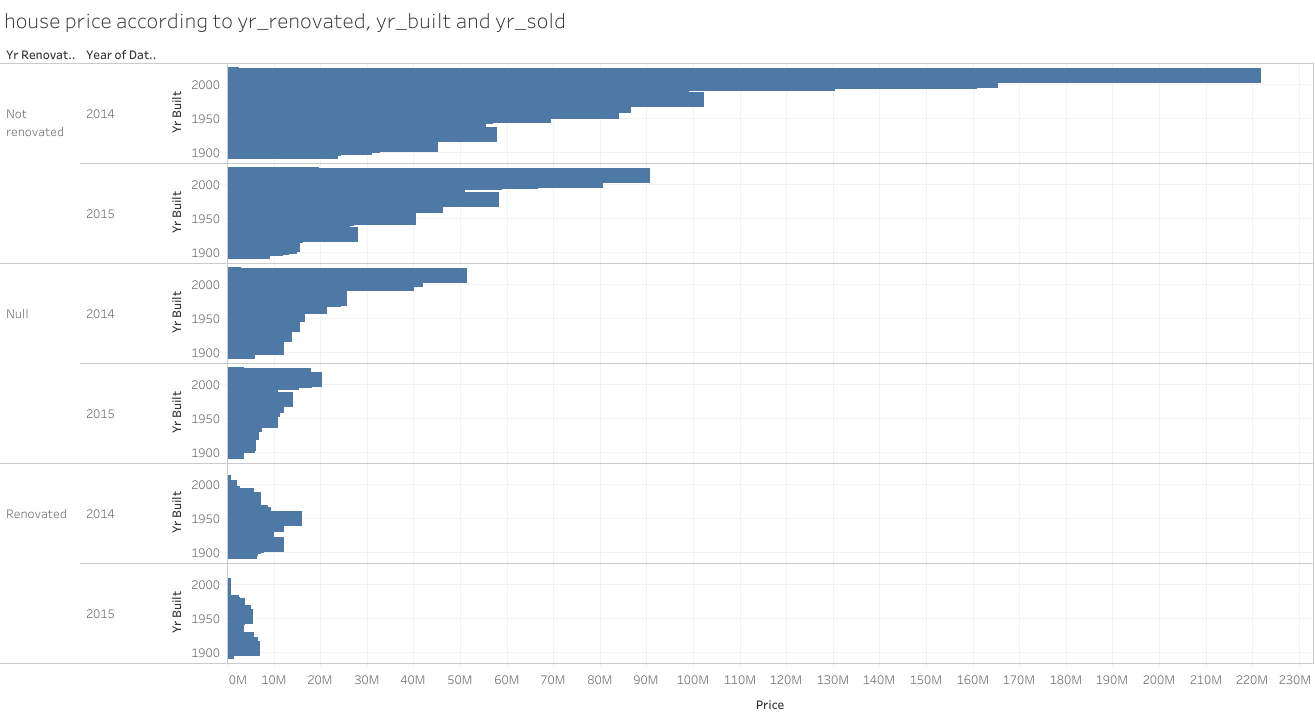**picture source Tableau**


From the image above, we observe that houses sold in 2014 were sold at a higher price compared to houses sold in 2015
We also notice that the 'unrenovated' and null(lacking yr_renovated) houses sold at a higher price than renovated houses.
Question: What would cause a renovated home sell at a lesser amount ?

In [25]:
# creating a new data set from the first where the yr_renovated is given
housing_df1 = housing_df[housing_df['yr_renovated'] > 0]
housing_df1

,Selling price,bedrooms,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,month_sold,year_sold,Age
id,,,,,,,,,,,,
6414100192,538000.0,3,2570,7242,0.0,3,7,1951,1991.0,12,12,64
9547205180,696000.0,3,2300,3060,0.0,3,8,1930,2002.0,6,6,85
1483300570,905000.0,4,3300,10250,0.0,3,7,1946,1991.0,9,9,69
2450000295,1090000.0,3,2920,8113,0.0,3,8,1950,2010.0,10,10,65
4389200955,1450000.0,4,2750,17789,0.0,3,8,1914,1992.0,3,3,101
...,...,...,...,...,...,...,...,...,...,...,...,...
6392000625,451000.0,2,900,6000,0.0,3,7,1944,2004.0,7,7,71
126039256,434900.0,3,1520,5040,0.0,3,7,1977,2006.0,9,9,38
4305600360,500012.0,4,2400,9612,0.0,3,8,1962,2009.0,2,2,53


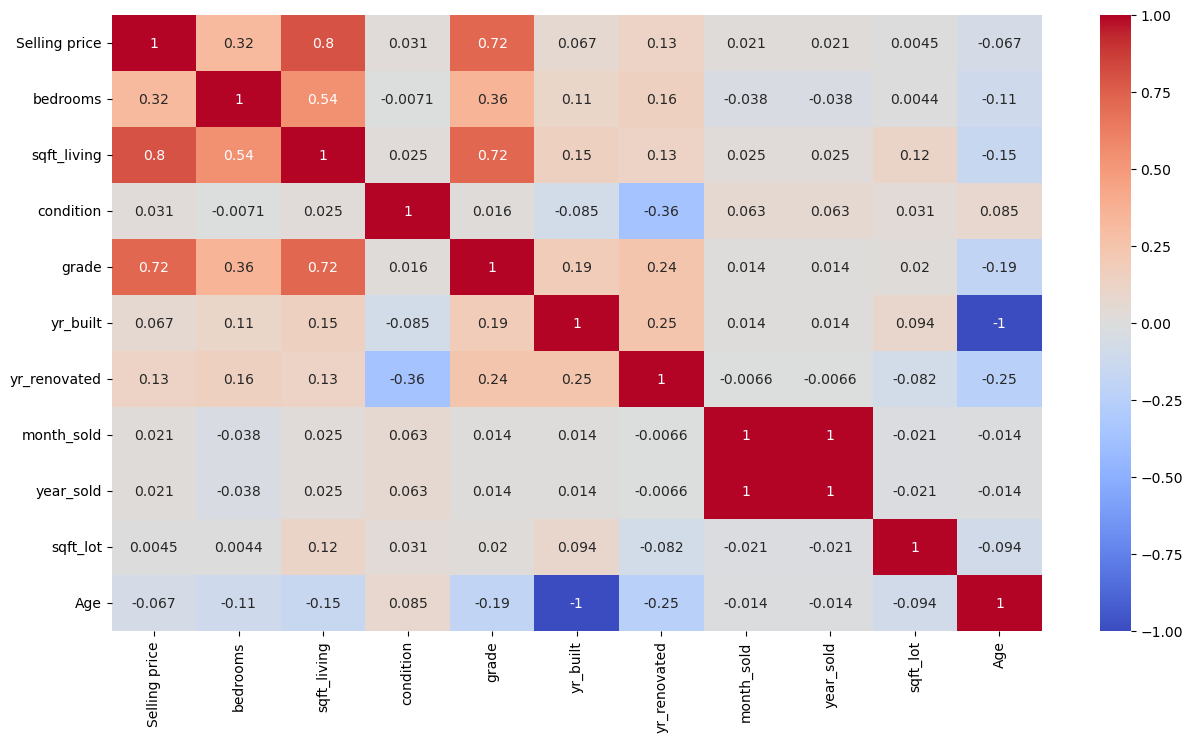

In [26]:
plt.figure(figsize=(15, 8))
corr_matrix2 =housing_df1[['Selling price','bedrooms','sqft_living','condition','grade', 'yr_built','yr_renovated','month_sold','year_sold', 'sqft_lot','Age']].corr()
sns.heatmap(corr_matrix2, cmap='coolwarm',annot=True)
plt.show()

Even after removing the null values in yr_renovated we can still note that there is no correlation between a number of columns.
Correlation ranges from 1 to -1.
1 meaning highly correlated , 0 meaning little or no correlation.


### *plots on how grade of the house relates with other  house features*

Text(0.5, 1.0, 'Selling Price vs Grade')

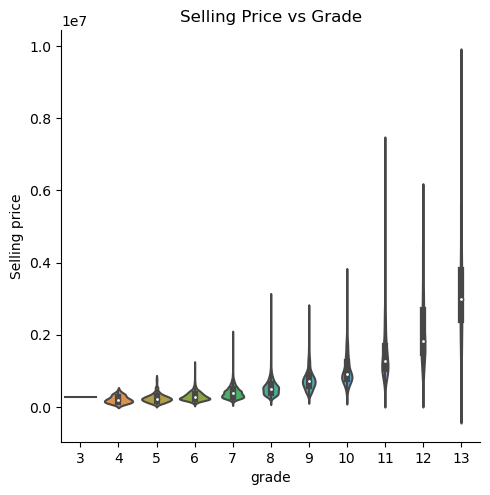

In [27]:
sns.catplot(data=housing_df, kind="violin", x="grade", y="Selling price",  split=True)
plt.title("Selling Price vs Grade")

Text(0.5, 1.0, 'sqft_living vs Grade')

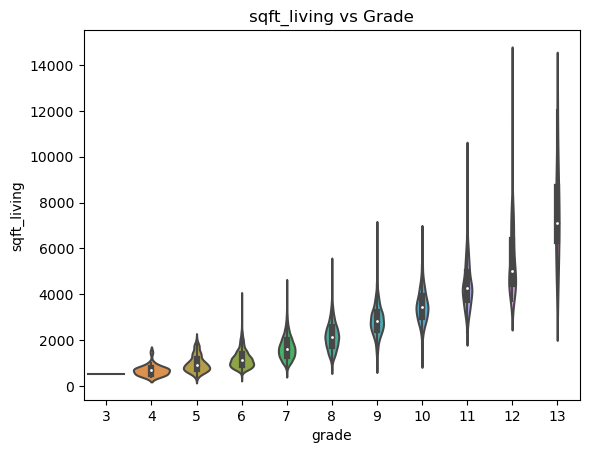

In [28]:
sns.violinplot(data=housing_df, x="grade", y="sqft_living")
plt.title("sqft_living vs Grade")

Text(0.5, 1.0, 'yr_built vs Grade')

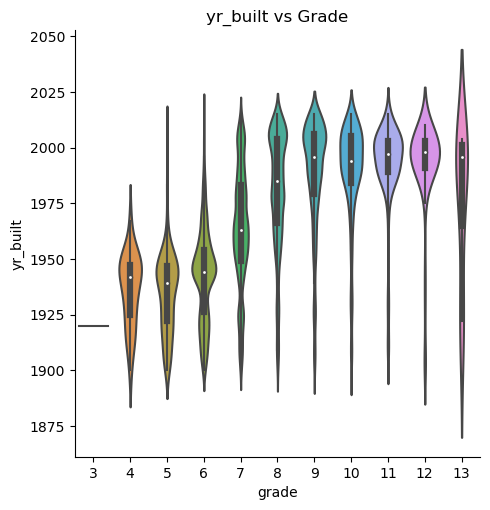

In [29]:
# violin plot on grade and year built
sns.catplot(data=housing_df, kind="violin", x="grade", y="yr_built",  split=True)
plt.title("yr_built vs Grade")

Text(0.5, 1.0, 'scatter on yr_built against Grade')

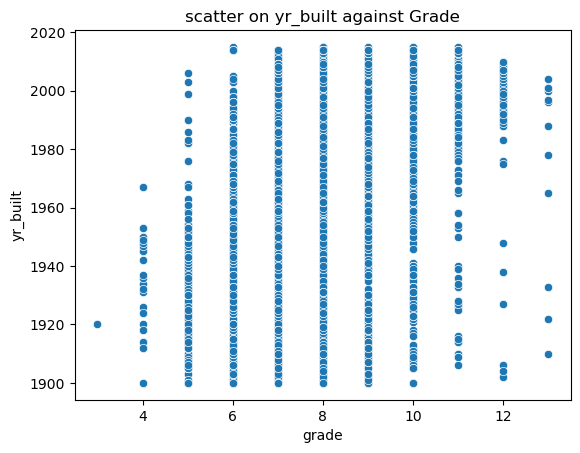

In [30]:
sns.scatterplot(data=housing_df, x="grade", y="yr_built")
plt.title("scatter on yr_built against Grade")

Text(0.5, 1.0, 'sqft_living vs number of bedrooms')

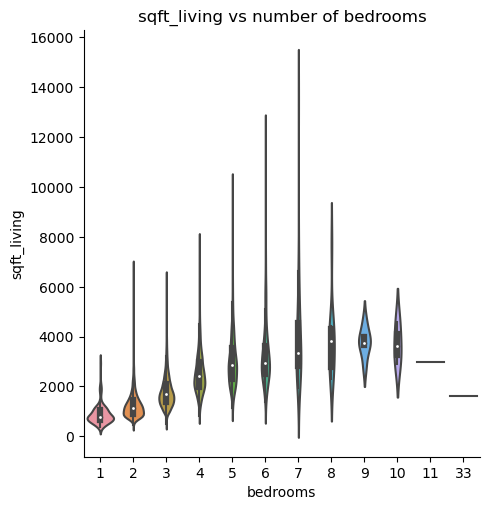

In [31]:
# violin plot on bedroom and sqft_living
sns.catplot(data=housing_df, kind="violin", x="bedrooms", y="sqft_living",  split=True)
plt.title("sqft_living vs number of bedrooms")

### *plots on how condition of the house relates with other  house features*

Text(0.5, 1.0, 'Selling price against House condition')

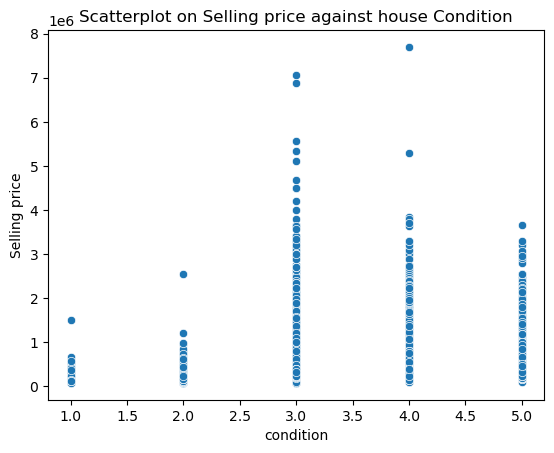

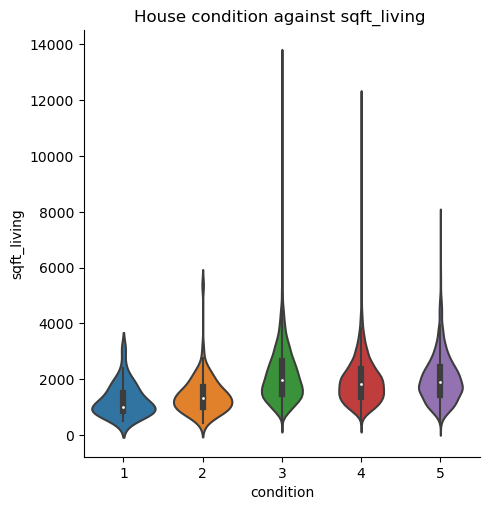

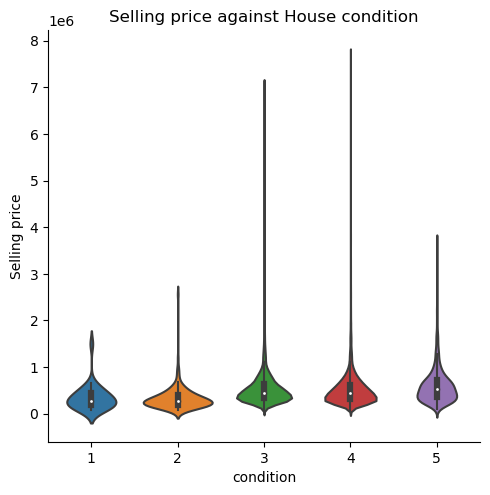

In [32]:
sns.scatterplot(data=housing_df, x="condition", y="Selling price")
plt.title("Scatterplot on Selling price against house Condition")
sns.catplot(data=housing_df, kind="violin", x="condition", y="sqft_living",  split=True)
plt.title("House condition against sqft_living ")
sns.catplot(data=housing_df, kind="violin", x="condition", y="Selling price",  split=True)
plt.title("Selling price against House condition")


Text(0.5, 1.0, 'House condition against the age of the house')

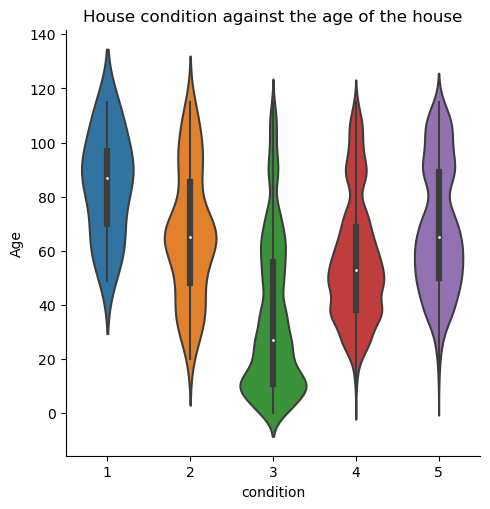

In [33]:
sns.catplot(data=housing_df, kind="violin", x="condition", y="Age",  split=True)
plt.title("House condition against the age of the house")

### *plots on how number of bedrooms in a house relate with other  house features*

Text(0.5, 1.0, 'Number of bedrooms against sqft_living and grade')

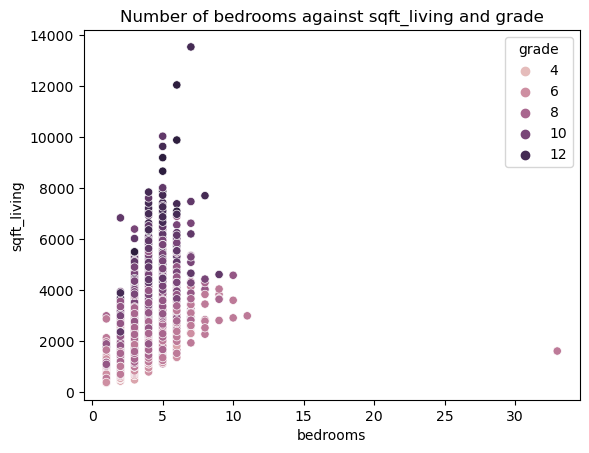

In [34]:
#scatterplot 
sns.scatterplot(data=housing_df, x="bedrooms", y="sqft_living", hue ="grade")
plt.title("Number of bedrooms against sqft_living and grade")

Text(0.5, 1.0, 'sqft_living vs bedrooms')

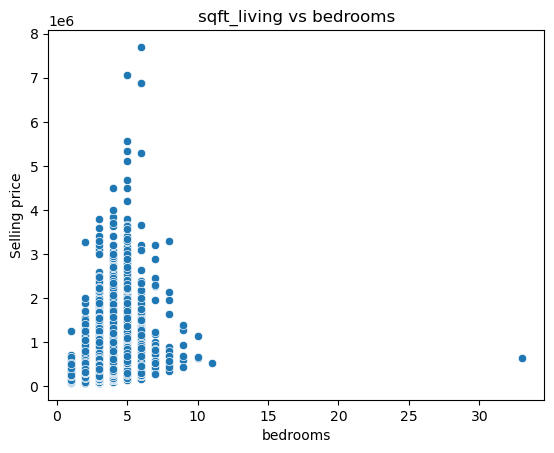

In [35]:
sns.scatterplot(data=housing_df, x="bedrooms", y="Selling price")
plt.title("sqft_living vs bedrooms")

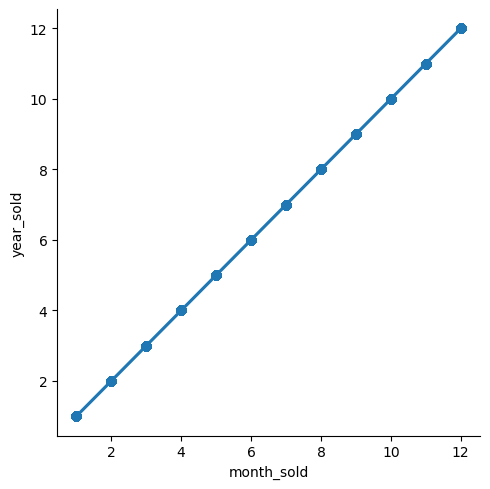

In [36]:
sns.lmplot(data=housing_df, x="month_sold", y="year_sold")

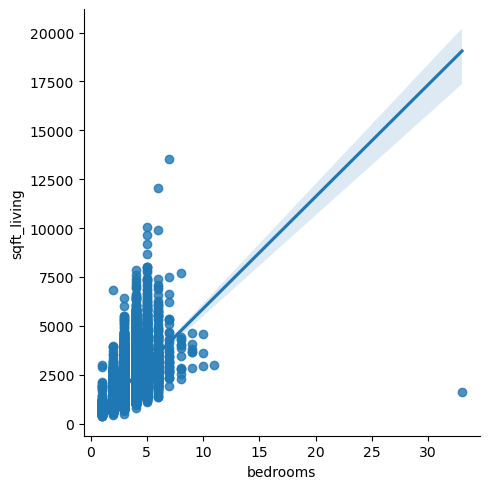

In [37]:
sns.lmplot(data=housing_df, x="bedrooms", y="sqft_living")

Text(0.5, 1.0, 'Selling price against number of bedrooms according to grade ')

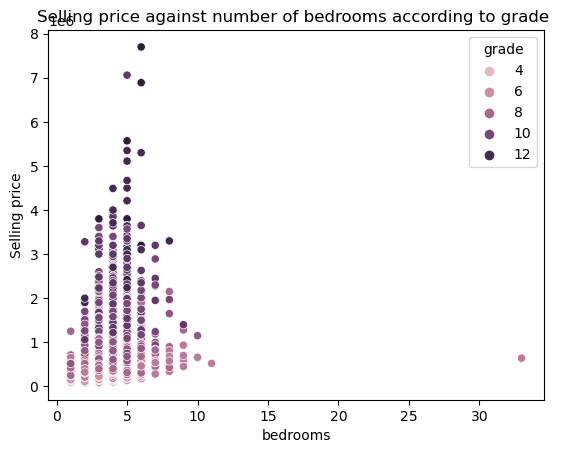

In [38]:
sns.scatterplot(data=housing_df, x="bedrooms", y="Selling price", hue="grade")
plt.title("Selling price against number of bedrooms according to grade ")

Text(0.5, 1.0, 'Selling price against grade')

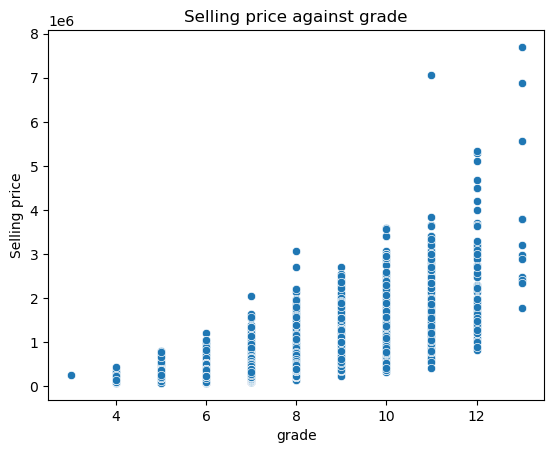

In [39]:
sns.scatterplot(data=housing_df, x="grade", y="Selling price")
plt.title("Selling price against grade") 

### *plots on how the age of the house relates with other  house features*

Text(0.5, 1.0, 'Selling price vs Age')

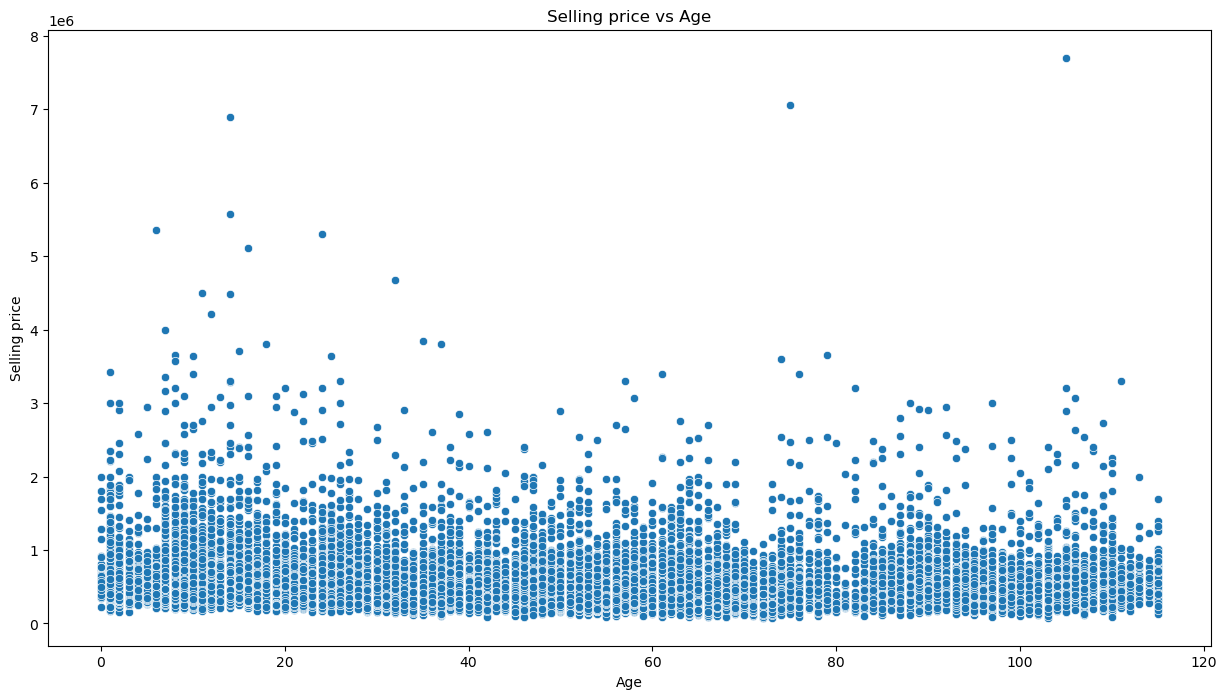

In [40]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=housing_df, x="Age", y="Selling price")
plt.title("Selling price vs Age")

From the above plots, we can notice that the *grade*, *bedroom* and *condition* are categorical but the data is in numeric format. Their plots are linear not clouded.

array([[<AxesSubplot:title={'center':'Selling price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>],
       [<AxesSubplot:title={'center':'month_sold'}>,
        <AxesSubplot:title={'center':'year_sold'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

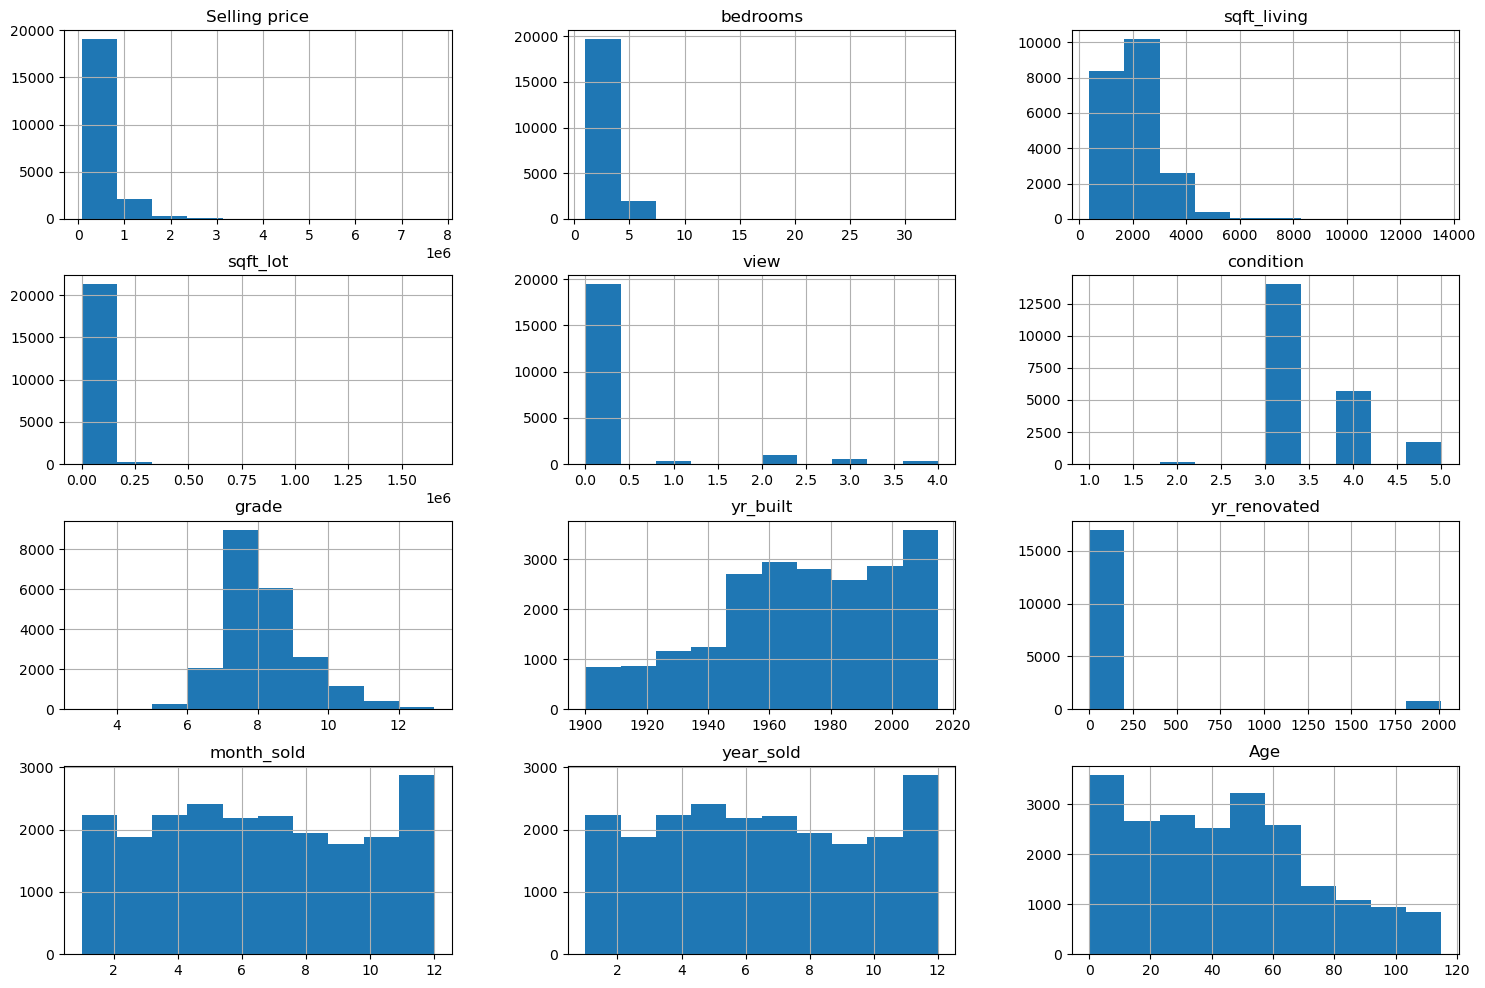

In [41]:
housing_df.hist(figsize=(18,12))

In [42]:
#logarithimic transformation on the data
housing_df['bedrooms'] = np.log(housing_df['bedrooms'] + 1)
housing_df['sqft_living'] = np.log(housing_df['sqft_living'] + 1)
housing_df['grade'] = np.log(housing_df['grade'] + 1)
housing_df['condition'] = np.log(housing_df['condition'] + 1)
housing_df['Age'] = np.log(housing_df['Age'] + 1)
housing_df['year_sold'] = np.log(housing_df['year_sold'] + 1)
housing_df['yr_built'] = np.log(housing_df['yr_built'] + 1)


<AxesSubplot:ylabel='Density'>

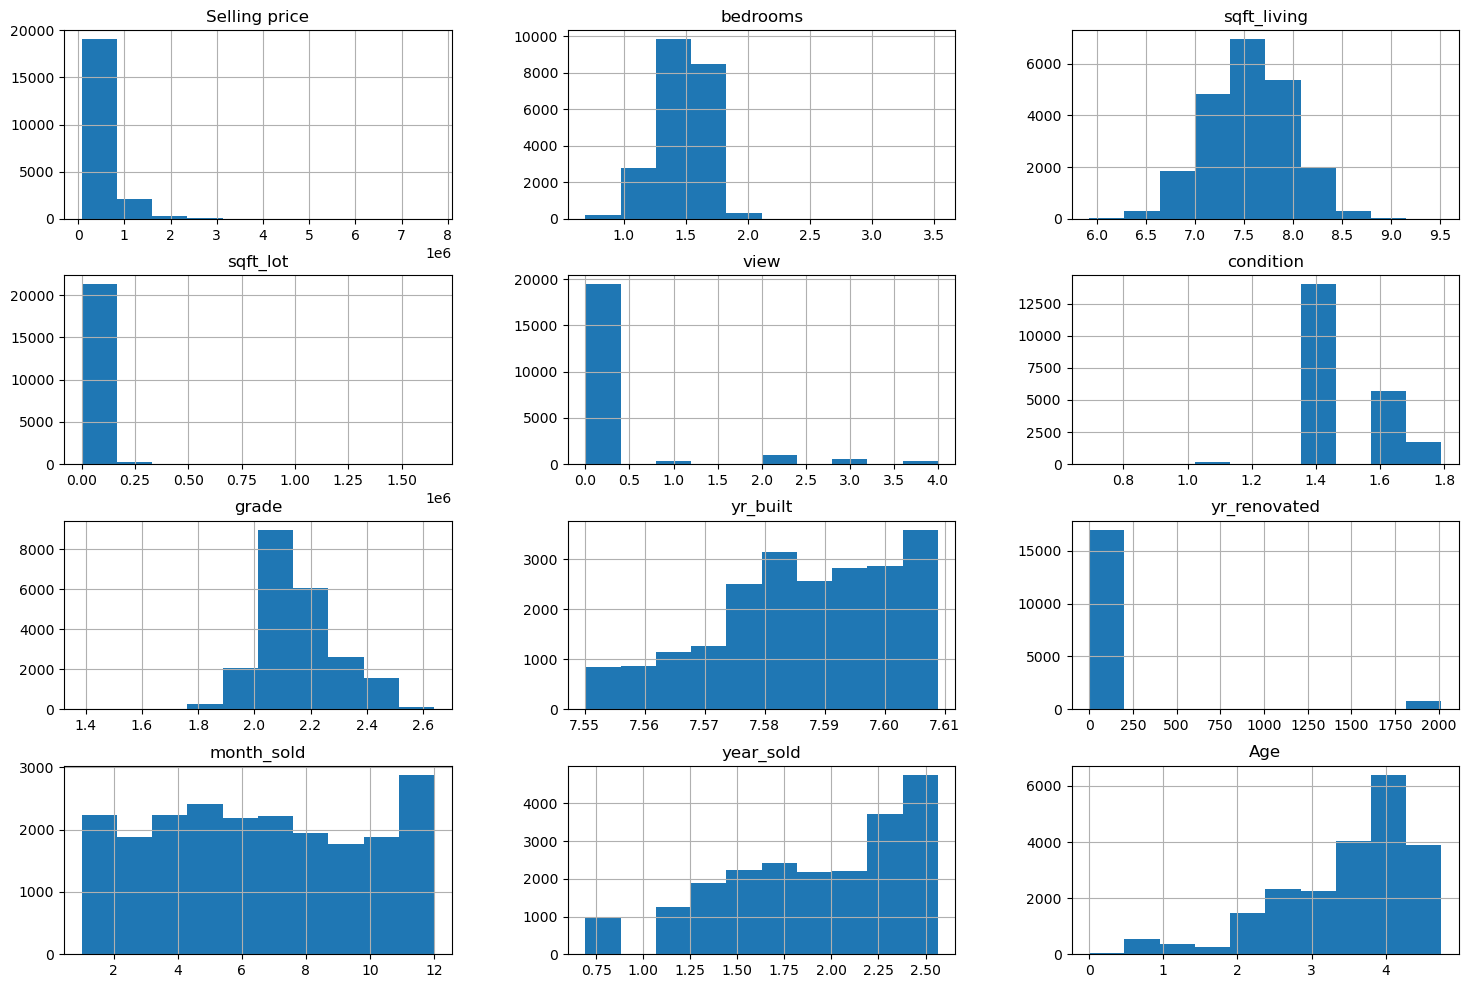

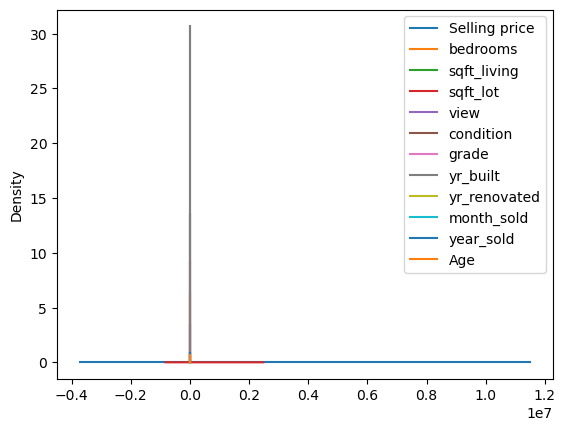

In [43]:
housing_df.hist(figsize=(18,12))
housing_df.plot.kde()

In [44]:
# splitting the data into train and test
# importing sk.learn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features = ['bedrooms','sqft_living','condition', 'grade', 'yr_built', 'Age', 'year_sold', 'month_sold']

X = housing_df[features]
y = housing_df['Selling price']

std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

In [45]:
housing_df[features].isna().sum()

bedrooms       0
sqft_living    0
condition      0
grade          0
yr_built       0
Age            0
year_sold      0
month_sold     0
dtype: int64

In [46]:
#splitting data into 80% train set and 20% test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

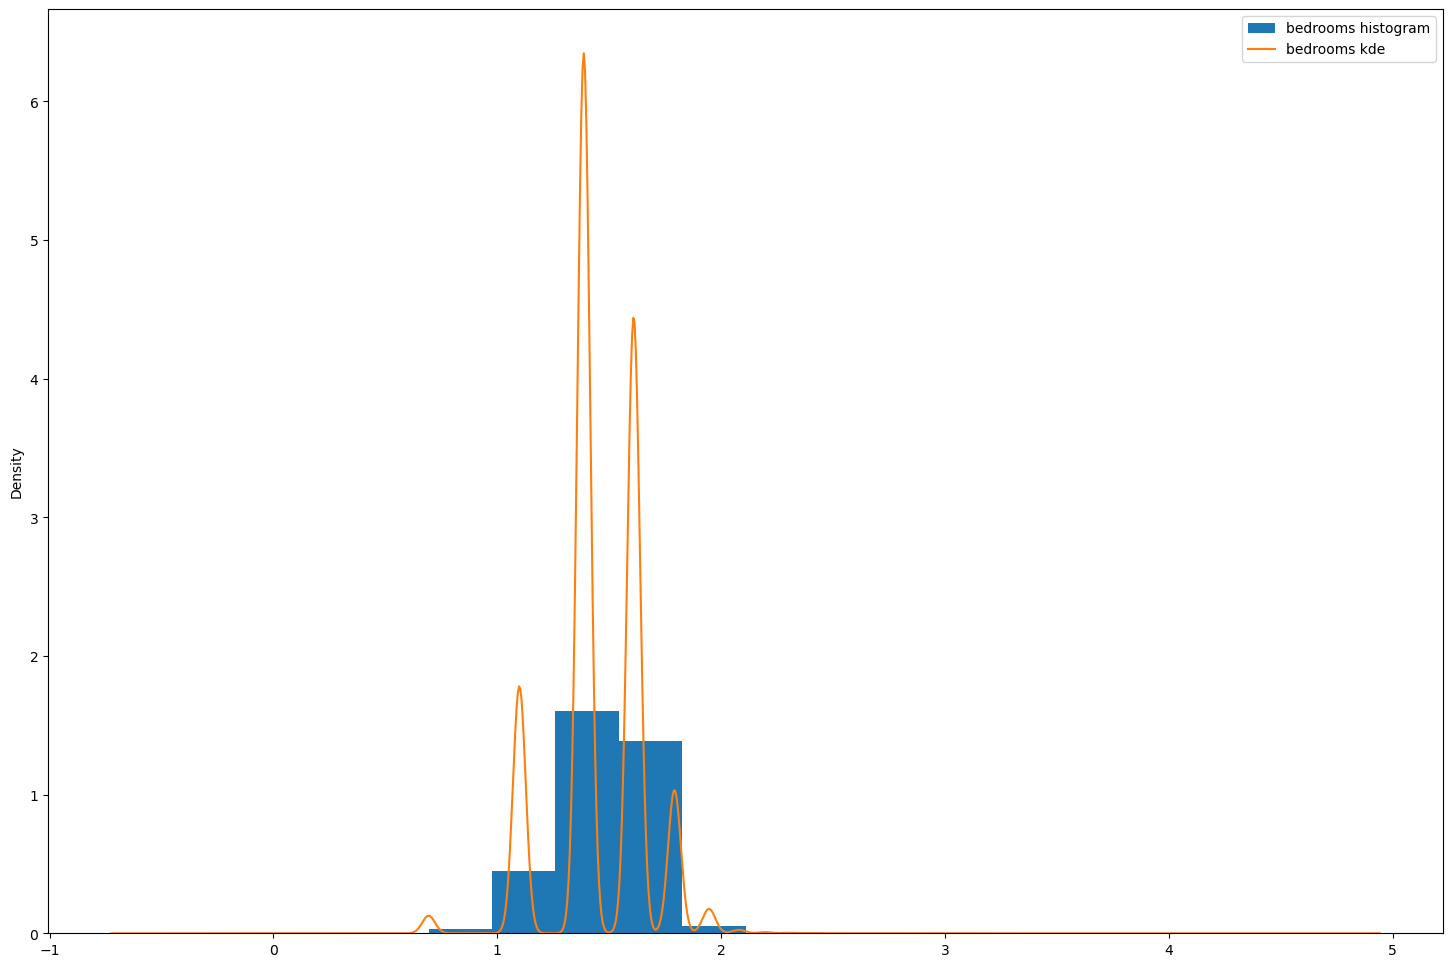

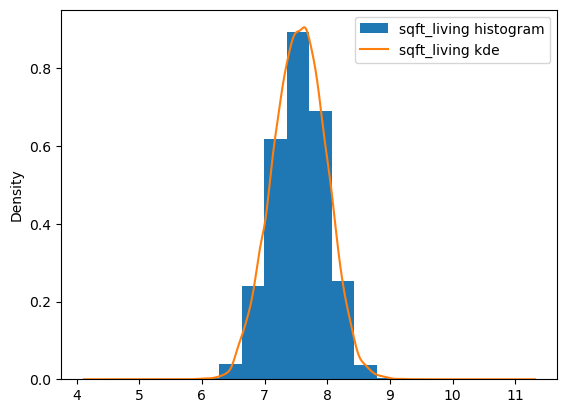

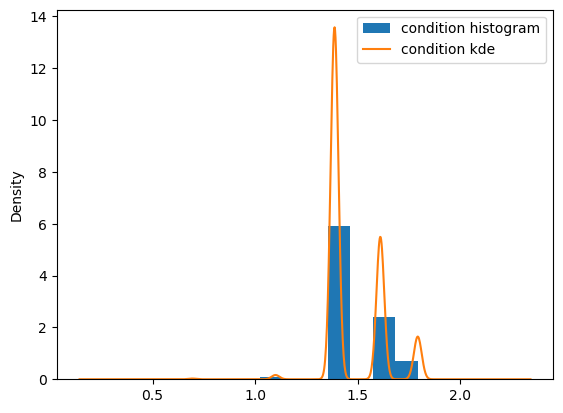

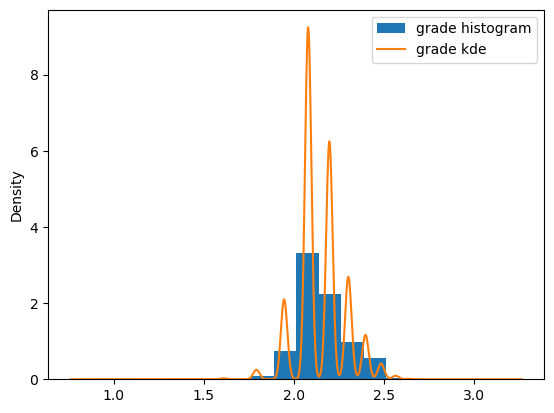

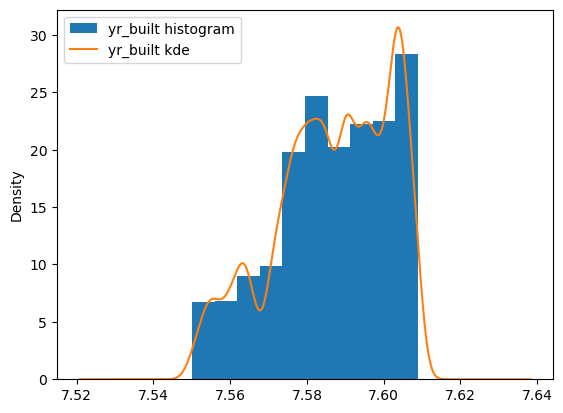

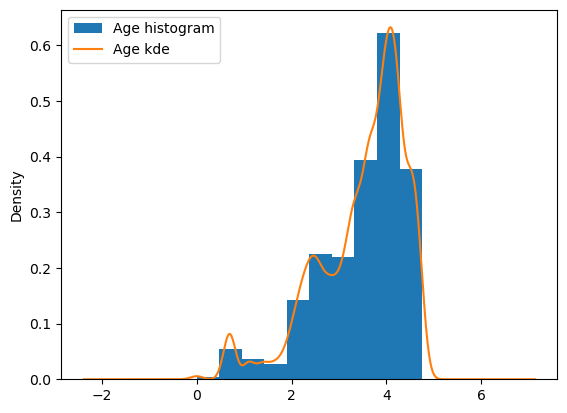

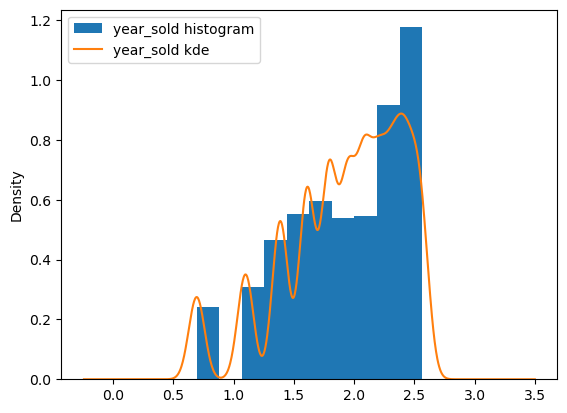

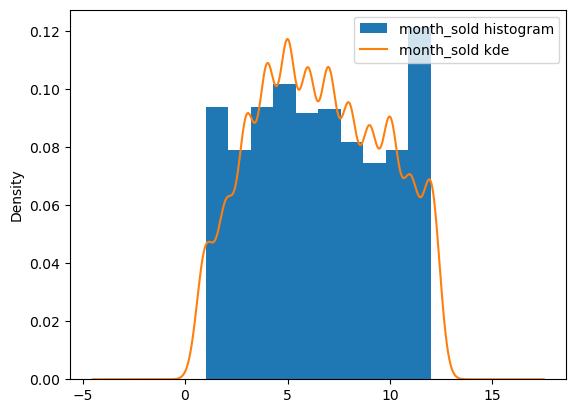

In [47]:
fig,axs = plt.subplots(figsize=(18,12))
for column in housing_df[features]:
    housing_df[column].plot.hist(density=True, label=column + ' histogram')
    housing_df[column].plot.kde(label=column + ' kde')
    plt.legend()
    plt.show()

### Building, Evaluating and Validating a model:

### Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [49]:
# prediction
y_pred = linreg.predict(X_test)

In [50]:
#prediction
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [51]:
# looking at residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [52]:
mse_train = float(np.sum((y_train - y_hat_train)**2)/len(y_train))
mse_test = float(np.sum((y_test - y_hat_test)**2)/len(y_test))

print("Train Mean Squared Error:", mse_train)
print("Test Mean Squared Error:", mse_test)


Train Mean Squared Error: 64734762468.22931
Test Mean Squared Error: 52928999142.0423


In [53]:
#look at the difference
print(mse_train - mse_test)

11805763326.187012


In [54]:
#r_squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-squared:', round(r2,4))


R-squared: 0.5504


R-squared of 0.55 mean that the Linear regression model explains 50% of the data. 

In [55]:
print('coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)


coefficients: [ -32201.37506689  141265.19504353   12985.6598352   196422.96932828
 -165246.47214152  -63638.57088521   13546.83699153  -22122.13617793]
Intercept: 540706.8875635003


### Multiple Linear Regression

In [56]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [57]:
formula = 'sqft_living ~ bedrooms + Age + grade + condition'
model = ols(formula = formula, data = housing_df[features]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                 1.306e+04
Date:                Sat, 01 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:33:46   Log-Likelihood:                 1165.1
No. Observations:               21597   AIC:                            -2320.
Df Residuals:                   21592   BIC:                            -2280.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2261      0.035     63.917      0.000       2.158       2.294
bedrooms       0.8488      0.008    104.928      0.000       0.833       0.865
Age           -0.0059      0.002     -2.997      0.003      -0.010      -0.002
grade          1.8570      0.014    131.527      0.000       1.829       1.885
condition      0.0815      0.012      6.786      0.000       0.058       0.105
==============================================================================
Omnibus:                      231.348   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.352
Skew:                           0.166   Prob(JB):                     9.92e-66
Kurtosis:                       3.472   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Decision Tree Regression

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [59]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeRegressor


# Create a Decision Tree Regression model
dtr = DecisionTreeRegressor()

# Fit the model on the training data
dtr.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = dtr.predict(X_test)

# Evaluate the model performance using mean squared error metric
# Calculate the performance metrics

dtr_mse = mean_squared_error(y_test, y_pred)
dtr_r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('Mean Squared Error:', round(dtr_mse,2))
print('R-squared:', round(dtr_r2, 4))

Mean Squared Error: 83744168103.21
R-squared: 0.2886


The decison tree regression model only explains 31% of the data. 

### Random Forest Regression

In [60]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = rf.predict(X_test)

# Evaluate the model performance using mean squared error metric
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('Mean Squared Error:', round(rf_mse,2))
print('R-squared:', round(rf_r2))

Mean Squared Error: 41315188633.64
R-squared: 1


Random Forest Regression has an R-squared of 1 which means that 100% of the variance of the dependent variable is explained by the independent variables.

### Support Vector Regression (SVR):

In [61]:
from sklearn.svm import SVR

# Create and fit the model
svr = SVR(kernel='rbf', C=1e5, gamma=0.1)
svr.fit(X_train, y_train)

# prediction 
y_pred = svr.predict(X_test)

# Print the score

We specify the kernel to be a radial basis function ('rbf') and set the values of the C and gamma hyperparameters.



In [62]:
# Calculate the performance metrics
svr_mse = mean_squared_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('Mean Squared Error:', round(svr_mse,2))
print('R-squared:', round(svr_r2))


Mean Squared Error: 41278792744.87
R-squared: 1


In [63]:
# Create a dictionary with data
data = {'Algorithm': ['DTR', 'RFR', 'SVR', 'LRtrain', 'LRtest'],
        'MSE': [dtr_mse, rf_mse, svr_mse, mse_train, mse_test]}

# Create a DataFrame from the dictionary
df_mse = pd.DataFrame(data)
df_mse


,Algorithm,MSE
0,DTR,8.374417e+10
1,RFR,4.131519e+10
2,SVR,4.127879e+10
3,LRtrain,6.473476e+10
4,LRtest,5.292900e+10


### Comparing the Mean Squared Error of decision tree, random forest and Support vector Regression

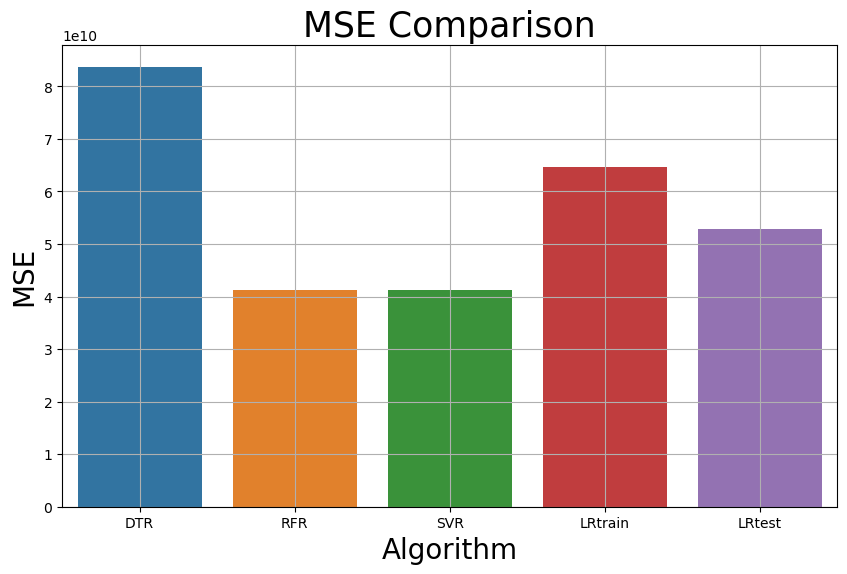

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithm',y='MSE', data=df_mse)
plt.title("MSE Comparison", fontsize=25)
plt.xlabel("Algorithm",fontsize=20)
plt.ylabel("MSE",fontsize=20)
plt.grid()
plt.show()


Random Forest Regression and Support Vector regression have the same MSE which is much lower than the MSE of Decission Tree Regression.


### validating using k-fold cross validation


In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y , cv=10, scoring = 'neg_mean_squared_error')

# calculating mean squared error and root mean squared error
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
mean_rmse = rmse_scores.mean()

print('Cross validation RMSE scores:', rmse_scores)
print('Mean RMSE:', mean_rmse)

Cross validation RMSE scores: [229961.84965024 224345.11042091 191335.12038472 218796.5932068
 190736.26849734 224954.35389056 215521.55546348 208890.14820562
 214511.96419909 247851.28104889]
Mean RMSE: 216690.42449676438


The cross validation Rmse scores indicate that the model is not performing well. That the actual values and rmse are far away from each other.

### validating linear regression model


In [66]:
#R-squared of linear regression
cross_val_score(linreg, X, y)

array([0.5126482 , 0.5234896 , 0.53817338, 0.56511356, 0.54159308])

In [67]:
#mean squared error
cross_val_score(linreg, X, y, scoring = "neg_mean_squared_error")

array([-7.38809078e+10, -6.69016919e+10, -5.40400903e+10, -5.52840232e+10,
       -6.30580989e+10])

In [68]:
from sklearn.model_selection import cross_validate

cross_validate(linreg, X, y)["test_score"]

array([0.5126482 , 0.5234896 , 0.53817338, 0.56511356, 0.54159308])

### k fold cross validation

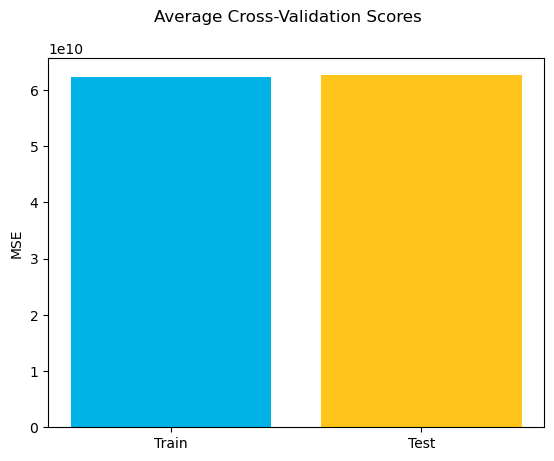

In [69]:
#fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
labels = ["Train", "Test"]
colors = ["#00B3E6", "#FFC51B"]

cross_val_results = cross_validate(linreg, X, y, scoring="neg_mean_squared_error", return_train_score=True)


train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

fig, ax = plt.subplots()
ax.bar(labels,[train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

The train and test data sets have the same MSE, this means that they are performing the same.

### Train test split

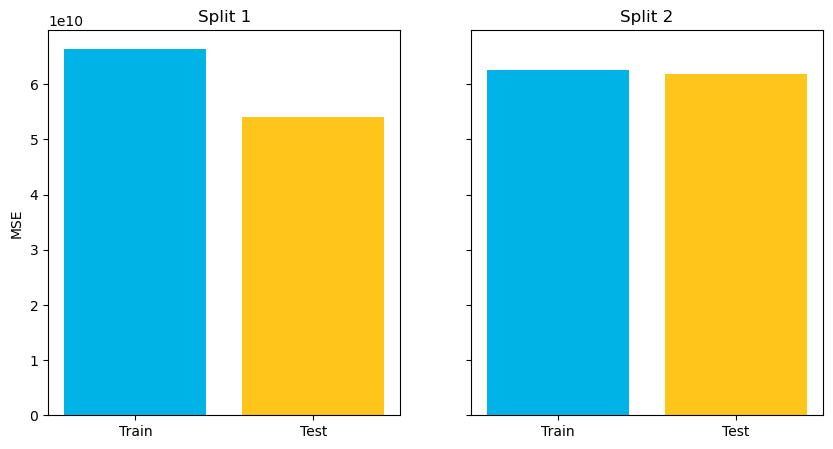

In [70]:
from sklearn.model_selection import train_test_split

# Split using random_state 0
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, random_state=0, test_size=0.33)
linreg.fit(X_train_1, y_train_1)
train_mse_1 = mean_squared_error(y_train_1, linreg.predict(X_train_1))
test_mse_1 = mean_squared_error(y_test_1, linreg.predict(X_test_1))

# Split using random_state 10
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, random_state=10, test_size=0.33)
linreg.fit(X_train_2, y_train_2)
train_mse_2 = mean_squared_error(y_train_2, linreg.predict(X_train_2))
test_mse_2 = mean_squared_error(y_test_2, linreg.predict(X_test_2))

# Plot metrics
fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
labels = ["Train", "Test"]
colors = ["#00B3E6", "#FFC51B"]
left.bar(labels, [train_mse_1, test_mse_1], color=colors)
left.set_title("Split 1")
left.set_ylabel("MSE")
right.bar(labels, [train_mse_2, test_mse_2], color=colors)
right.set_title("Split 2");

second split is almost the same as the split from k-fold cross validation

### performing Simple Linear regression

In [71]:
# importing necessary libraries
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf


### Performing multiple linear regression

In [72]:
predictors = housing_df[features]
predictors_int = sm.add_constant(predictors)

model = sm.OLS(housing_df['Selling price'], predictors_int).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     3142.
Date:                Sat, 01 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:36:59   Log-Likelihood:            -2.9905e+05
No. Observations:               21597   AIC:                         5.981e+05
Df Residuals:                   21588   BIC:                         5.982e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.954e+07   1.94e+06     40.981      0.000    7.57e+07    8.33e+07
bedrooms    -1.612e+05   1.08e+04    -14.875      0.000   -1.82e+05    -1.4e+05
sqft_living  3.316e+05   7413.526     44.729      0.000    3.17e+05    3.46e+05
condition    9.423e+04   1.31e+04      7.181      0.000    6.85e+04     1.2e+05
grade        1.462e+06   2.08e+04     70.443      0.000    1.42e+06     1.5e+06
yr_built    -1.111e+07   2.55e+05    -43.624      0.000   -1.16e+07   -1.06e+07
Age         -7.027e+04   4058.131    -17.315      0.000   -7.82e+04   -6.23e+04
year_sold    2.905e+04   1.38e+04      2.101      0.036    1951.981    5.61e+04
month_sold  -7107.5273   2146.772     -3.311      0.001   -1.13e+04   -2899.696
==============================================================================
Omnibus:                    21684.847   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3153346.386
Skew:                           4.616   Prob(JB):                         0.00
Kurtosis:                      61.472   Cond. No.                     1.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above summary we can tell that the data is positively skewed and from the results of kurtosis we can say it  leptokurtic

### Simple Linear Regression

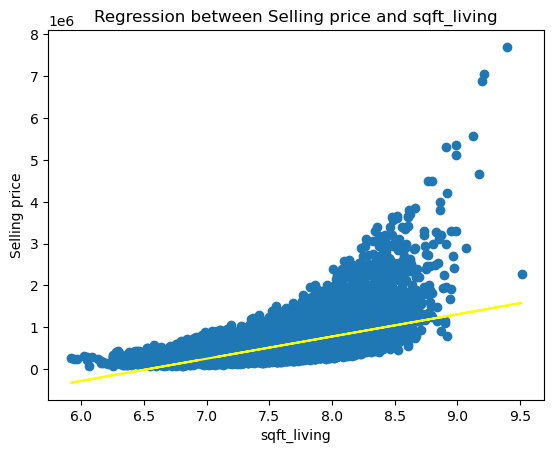

In [73]:
x = housing_df['sqft_living'].values.reshape(-1,1)
y = housing_df['Selling price']

model = LinearRegression()
model.fit(x,y)
#model parameters

slope = model.coef_[0]
intercept = model.intercept_

#visualization

plt.scatter(x,y)
plt.plot(x, model.predict(x), color='yellow')
plt.xlabel("sqft_living")
plt.ylabel("Selling price")
plt.title("Regression between Selling price and sqft_living")
plt.show()

In [74]:
#import stats
from scipy import stats
#calculating the z-score to remove outliers
z_scores = np.abs(stats.zscore(housing_df['sqft_living']))

#threshold for z_score
threshold = 2

#remove any data points with a z_score greater than 2
clean_df = housing_df[z_scores < threshold]

#performing regression analysis on the clean data

x = clean_df['sqft_living'].values.reshape(-1,1)
y = clean_df['Selling price']

model = LinearRegression()
model.fit(x,y)

LinearRegression()

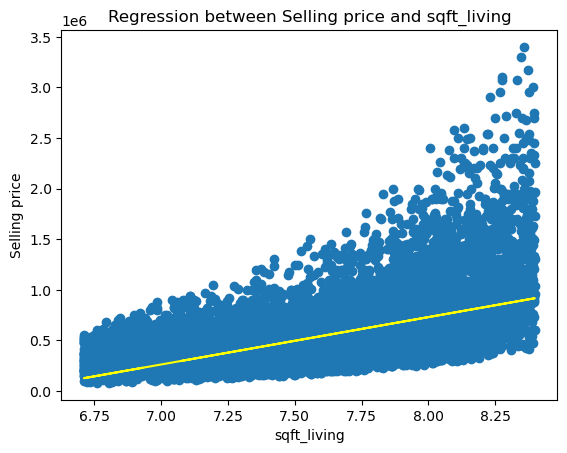

In [75]:
plt.scatter(x,y)
plt.plot(x, model.predict(x), color='yellow')
plt.xlabel("sqft_living")
plt.ylabel("Selling price")
plt.title("Regression between Selling price and sqft_living")
plt.show()

and all the other features are dependent on the sqft_living size

### Answering Analytical Questions

1. Renovating the house does not increase Selling price
From the tableau picture we can see that people paid less for houses that were already renovated and more for houses that had not been renovated. Maybe the renovated houses were not renovated to the customer or buyers prefrence thats why the houses sold for less. The customer should be given a choice on how they want their houses to look like.

2. House features like number of bedrooms, and the size of living room affect the selling price. As the number of bedroom and size of living room increase, the Selling price increases.

3. The grade of the house affect the Selling price as seen, higher house grades, cause more. Most house with condition 3 and above have a higher selling price than houses in condition 1 and 2.


## Conclusion

From the results:
 - Sqft_living is the main feature in determing the Selling price. A larger living area results to more selling price.
 - The Company should consider the customers opinion on how they would like the houses renovated.
 - The condition  and grade of the house should be improved before selling because they are independent of how old the house is.
A house can be old but still have a good grade and condition